In [83]:
import scipy.io
import pandas as pd
import matplotlib.pyplot as plt

In [84]:
mat = scipy.io.loadmat('E:\LAB\ScaleMind\Data_ECG\TrainingSet1\TrainingSet1\A0011.mat')

In [85]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'ECG'])

In [86]:
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Dec 19 17:00:59 2017',
 '__version__': '1.0',
 '__globals__': [],
 'ECG': array([[(array(['Male'], dtype='<U4'), array([[87]], dtype=uint8), array([[ 1.83733889e-02,  3.53733889e-02,  4.73733889e-02, ...,
                 -1.76266111e-02, -1.36266111e-02, -1.06266111e-02],
                [-7.67626667e-02, -6.07626667e-02, -5.17626667e-02, ...,
                 -2.27626667e-02, -1.77626667e-02, -1.47626667e-02],
                [-9.51360556e-02, -9.61360556e-02, -9.91360556e-02, ...,
                 -5.13605556e-03, -4.13605556e-03, -4.13605556e-03],
                ...,
                [ 6.47714444e-02,  4.67714444e-02,  2.97714444e-02, ...,
                  7.71444444e-04,  1.77144444e-03,  1.77144444e-03],
                [-3.53959222e-01, -3.51959222e-01, -3.51959222e-01, ...,
                 -9.59222222e-04,  4.07777778e-05, -9.59222222e-04],
                [-7.76268056e-01, -7.64268056e-01, -7.54268056e-

In [87]:
x = mat.get("ECG")

In [88]:
type(x)

numpy.ndarray

In [89]:
x

array([[(array(['Male'], dtype='<U4'), array([[87]], dtype=uint8), array([[ 1.83733889e-02,  3.53733889e-02,  4.73733889e-02, ...,
                -1.76266111e-02, -1.36266111e-02, -1.06266111e-02],
               [-7.67626667e-02, -6.07626667e-02, -5.17626667e-02, ...,
                -2.27626667e-02, -1.77626667e-02, -1.47626667e-02],
               [-9.51360556e-02, -9.61360556e-02, -9.91360556e-02, ...,
                -5.13605556e-03, -4.13605556e-03, -4.13605556e-03],
               ...,
               [ 6.47714444e-02,  4.67714444e-02,  2.97714444e-02, ...,
                 7.71444444e-04,  1.77144444e-03,  1.77144444e-03],
               [-3.53959222e-01, -3.51959222e-01, -3.51959222e-01, ...,
                -9.59222222e-04,  4.07777778e-05, -9.59222222e-04],
               [-7.76268056e-01, -7.64268056e-01, -7.54268056e-01, ...,
                -1.72680556e-02, -1.72680556e-02, -1.62680556e-02]]))                                                             ]],
      dtype=[('

In [90]:
x.shape

(1, 1)

In [91]:
a = x[0][0]

In [92]:
type(a)

numpy.void

In [93]:
a[0]

array(['Male'], dtype='<U4')

In [94]:
a

(array(['Male'], dtype='<U4'), array([[87]], dtype=uint8), array([[ 1.83733889e-02,  3.53733889e-02,  4.73733889e-02, ...,
        -1.76266111e-02, -1.36266111e-02, -1.06266111e-02],
       [-7.67626667e-02, -6.07626667e-02, -5.17626667e-02, ...,
        -2.27626667e-02, -1.77626667e-02, -1.47626667e-02],
       [-9.51360556e-02, -9.61360556e-02, -9.91360556e-02, ...,
        -5.13605556e-03, -4.13605556e-03, -4.13605556e-03],
       ...,
       [ 6.47714444e-02,  4.67714444e-02,  2.97714444e-02, ...,
         7.71444444e-04,  1.77144444e-03,  1.77144444e-03],
       [-3.53959222e-01, -3.51959222e-01, -3.51959222e-01, ...,
        -9.59222222e-04,  4.07777778e-05, -9.59222222e-04],
       [-7.76268056e-01, -7.64268056e-01, -7.54268056e-01, ...,
        -1.72680556e-02, -1.72680556e-02, -1.62680556e-02]]))

In [95]:
a[2].shape


(12, 18000)

In [107]:
print(len(a[2][1]))

18000


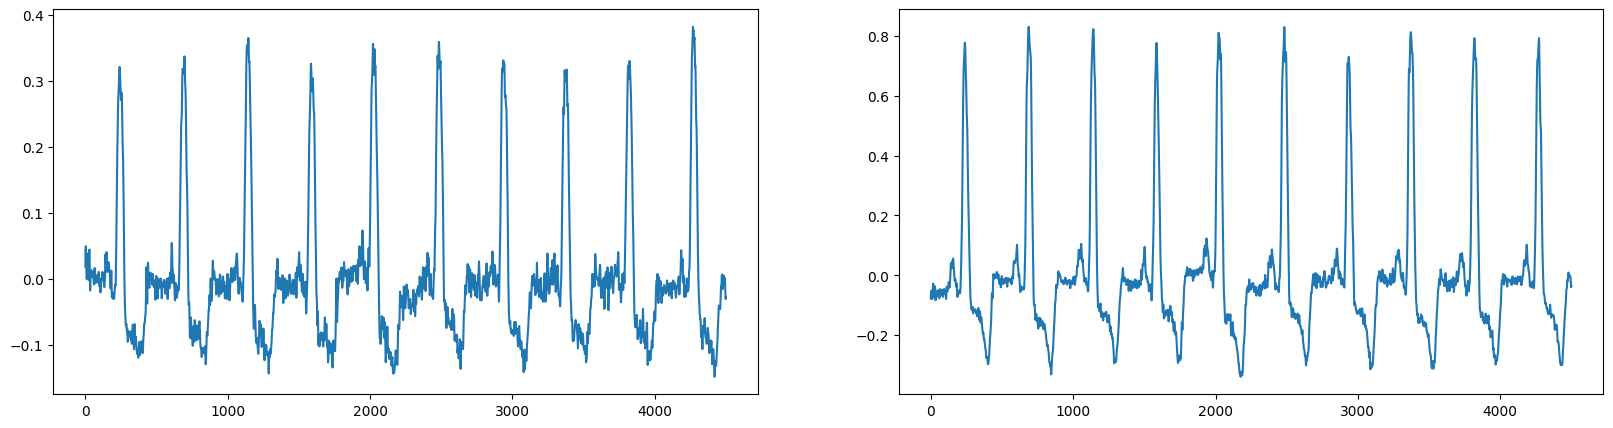

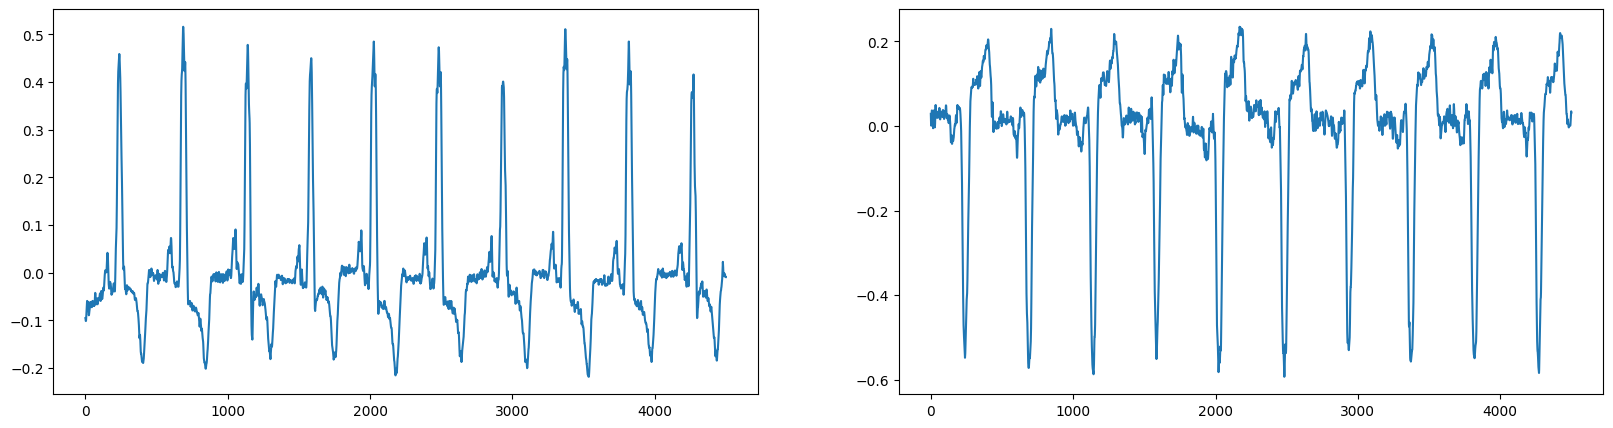

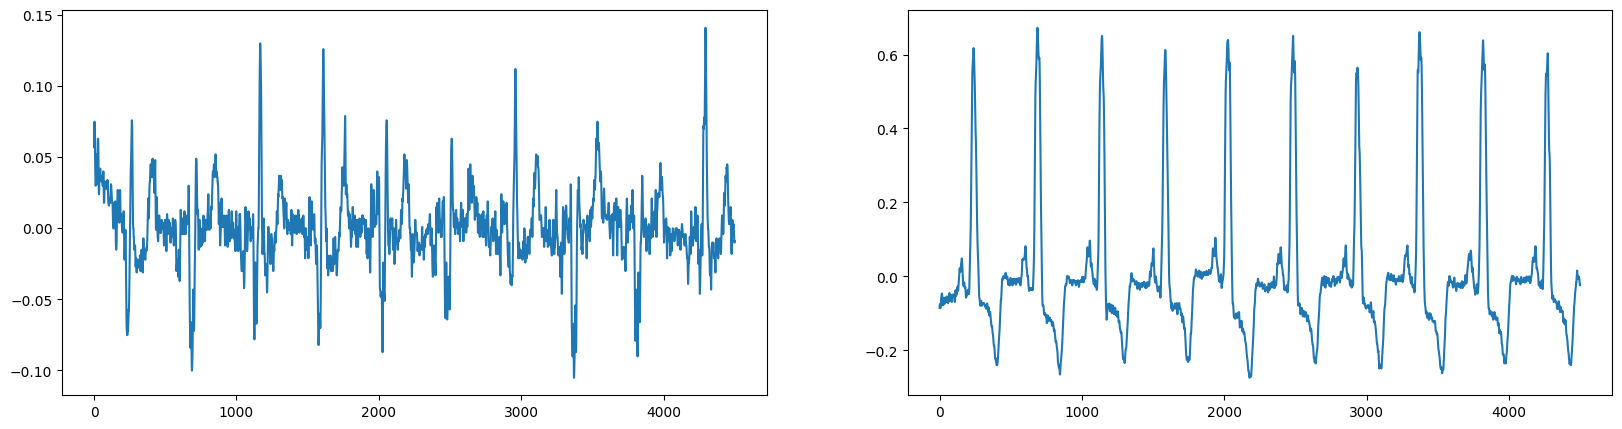

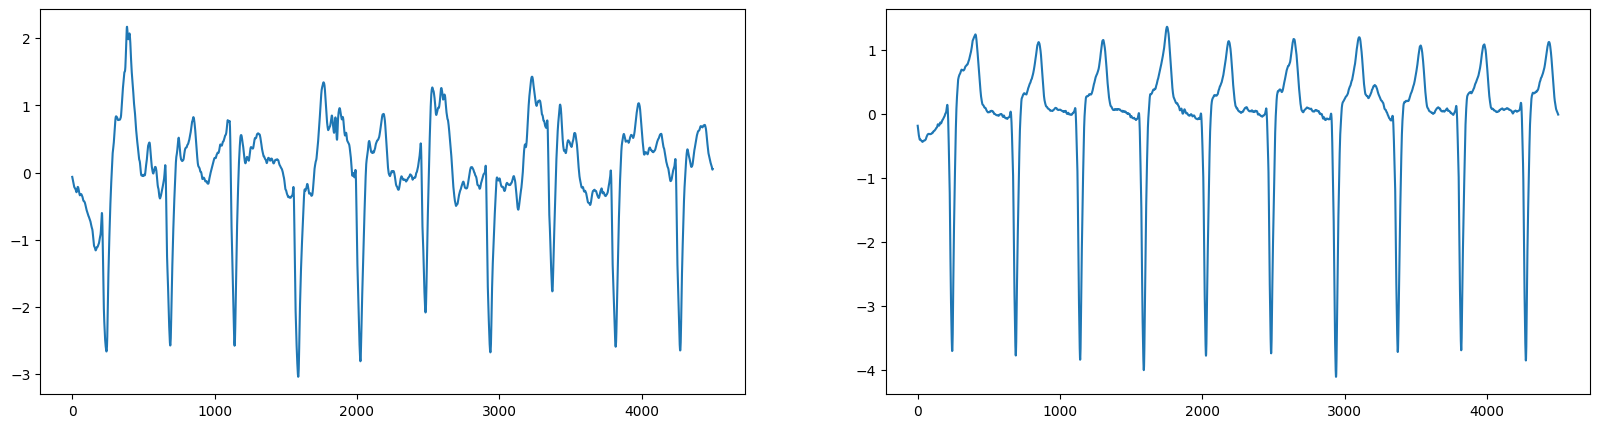

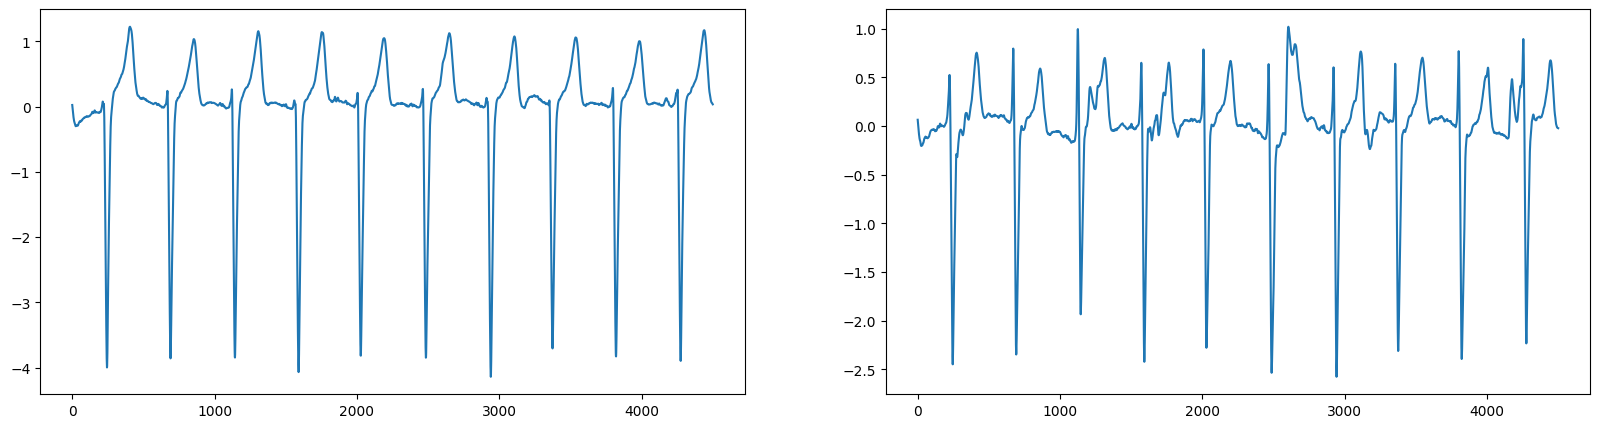

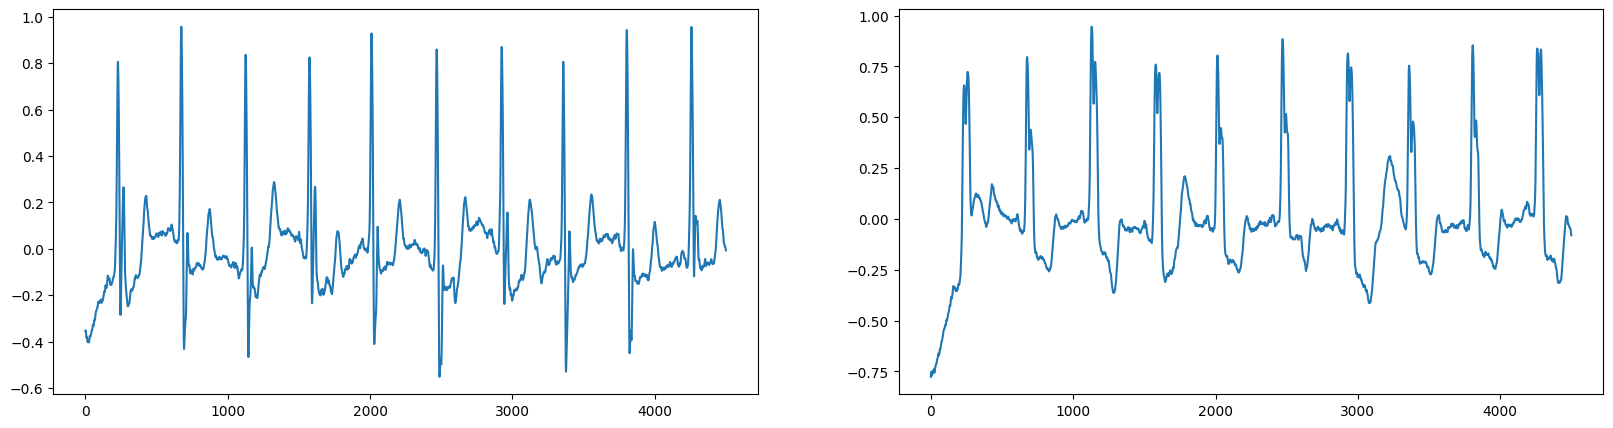

In [97]:
def plots(i):
    plt.figure(figsize = (20,5))
    plt.subplot(121)
    plt.plot(a[2][i][0:4500])

    plt.subplot(122)
    plt.plot(a[2][i+1][0:4500])


for i in range(11):
    if i % 2 ==0:
        plots(i)
